In [1]:
#Cell_1.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Cell_2.
csv_in="stock-D.csv"
df_a = pd.read_csv(csv_in,skiprows=0,header=0,delimiter=',',encoding="utf-8")
print(df_a.shape) #確認
print(df_a.info()) #確認
display(df_a.head()) #確認

print(type(df_a['日付'][0]))
df_a['日付']=pd.to_datetime(df_a['日付'])
print(type(df_a['日付'][0]))

print(df_a.info()) #確認

(120, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   日付      120 non-null    object 
 1   始値      120 non-null    float64
 2   高値      120 non-null    float64
 3   安値      120 non-null    float64
 4   終値      120 non-null    float64
 5   出来高     120 non-null    int64  
 6   終値調整値   120 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 6.7+ KB
None


,日付,始値,高値,安値,終値,出来高,終値調整値
0,2018-01-04,893.0,893.7,884.3,1890.5,21669000,890.5
1,2018-01-05,892.9,903.5,892.2,1896.6,25565000,896.6
2,2018-01-09,910.0,914.9,907.1,1912.5,24605000,912.5
3,2018-01-10,912.0,917.8,906.2,1917.5,20409000,917.5
4,2018-01-11,911.1,914.3,904.6,1914.3,13674000,914.3


<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   日付      120 non-null    datetime64[ns]
 1   始値      120 non-null    float64       
 2   高値      120 non-null    float64       
 3   安値      120 non-null    float64       
 4   終値      120 non-null    float64       
 5   出来高     120 non-null    int64         
 6   終値調整値   120 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 6.7 KB
None


データの初日を0日目としたときの日数と株価の回帰直線を求める  
まず日付の列をデータの初日を0日目としたときの日数に変換  

In [3]:
#Cell_3.
df_a2=df_a.copy()
df_a2['日付']-=df_a2['日付'][0]
print(type(df_a2['日付'][0]))
df_a2['日付']/=np.timedelta64(1,'D')
print(type(df_a2['日付'][0]))
print(df_a2.head())

<class 'pandas._libs.tslibs.timedeltas.Timedelta'>
<class 'numpy.float64'>
    日付     始値     高値     安値      終値       出来高  終値調整値
0  0.0  893.0  893.7  884.3  1890.5  21669000  890.5
1  1.0  892.9  903.5  892.2  1896.6  25565000  896.6
2  5.0  910.0  914.9  907.1  1912.5  24605000  912.5
3  6.0  912.0  917.8  906.2  1917.5  20409000  917.5
4  7.0  911.1  914.3  904.6  1914.3  13674000  914.3


In [4]:
#Cell_4.
print(type(df_a2))
df_a2=np.asarray(df_a2)
print(type(df_a2))
print(df_a2.shape)
X=df_a2[:,:1]
Y=df_a2[:,6]
print(X.shape)
print(Y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(120, 7)
(120, 1)
(120,)


回帰の計算

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     40.36
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           4.11e-09
Time:                        11:54:10   Log-Likelihood:                -618.23
No. Observations:                 120   AIC:                             1240.
Df Residuals:                     118   BIC:                             1246.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        867.2793      7.676    112.990      0.0

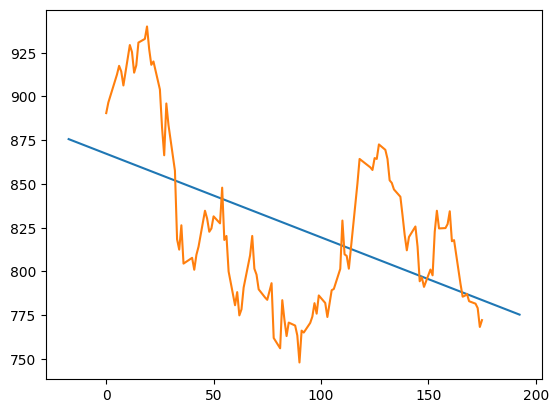

In [5]:
#Cell_5.
import statsmodels.api as sm

X=sm.add_constant(X)
model=sm.OLS(Y,X)
results=model.fit()
print(results.summary())
c=results.params[0]
a=results.params[1]
#print(mufj[:,0])
min_df=min(df_a2[:,0])
max_df=max(df_a2[:,0])
w_df = max_df - min_df
xx=np.linspace(min_df-0.1*w_df,max_df+0.1*w_df,20)
print(c,a)
#print(xx)
yy=c+a*xx
plt.plot(xx,yy)
plt.plot(df_a2[:,0],Y)
plt.show()

半年後の株価の予測値を求める

In [6]:
#Cell_6.
print("prediction for half-year later:",c+a*(max_df+50))

prediction for half-year later: 759.8176030185787


（参考）他企業との相関を比較

In [8]:
#Cell_7.
import scipy.stats as ss

csv_list=[ 'stock-A.csv','stock-B.csv','stock-C.csv']
r_list=[]
#print(mufj.head()) #debug
for csv1 in csv_list:
    print(csv1)
    if csv1 != 'stock-C.csv':
        com=pd.read_csv(csv1,skiprows=0,header=0,delimiter=',',encoding="utf-8")
    else:
        com=pd.read_csv(csv1,skiprows=0,header=0,delimiter=',',encoding="shift-jis")    
    com['日付']=pd.to_datetime(com['日付'])
    print(com.shape) #確認
    #print(com.head()) #debug
    merged=pd.merge(df_a, com, on='日付', how='inner')
    print(merged.shape) #確認
    #print(merged.head()) #debug
    merged_date=merged['日付']
    merged_date=pd.to_datetime(merged_date) #str型からdatetime型に型変換
    merged_mufj=merged['終値調整値_x']
    merged_com=merged['終値調整値_y']
    r,p=ss.pearsonr(merged_mufj, merged_com)
    r_list.append(r)

print(r_list)

#相関係数が最大、最小、ゼロに最も近いものをみつける。
i_min=0
i_max=0
i_zero=0
for i in range(len(r_list)):
    if r_list[i]<r_list[i_min]:
        i_min=i
    if r_list[i]>r_list[i_max]:
        i_max=i
    if abs(r_list[i])<abs(r_list[i_zero]):
        i_zero=i

stock-A.csv
(119, 7)
(119, 13)
stock-B.csv
(120, 7)
(120, 13)
stock-C.csv
(120, 7)
(120, 13)
[0.9114937462419802, -0.07079812367922954, 0.7311740932651997]


相関係数最大の企業との散布図とチャート重ね合わせ

In [9]:
#Cell_8.
com=pd.read_csv(csv_list[i_max],skiprows=0,header=0,delimiter=',',encoding="utf-8")
com['日付']=pd.to_datetime(com['日付'])
merged=pd.merge(df_a, com, on='日付', how='inner')
merged_date=merged['日付']
merged_date=pd.to_datetime(merged_date) #str型からdatetime型に型変換
merged_mufj=merged['終値調整値_x']
merged_com=merged['終値調整値_y']
print(csv_list[i_max]+':', r_list[i_max])

stock-A.csv: 0.9114937462419802


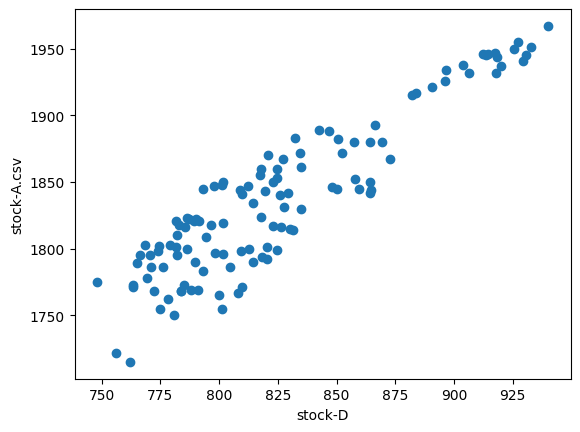

In [10]:
#Cell_9.
import re

plt.scatter(merged_mufj, merged_com)
plt.xlabel('stock-D')
com_label=re.sub(r'_2018[.]csv$', r'', csv_list[i_max])
plt.ylabel(com_label)
plt.show()

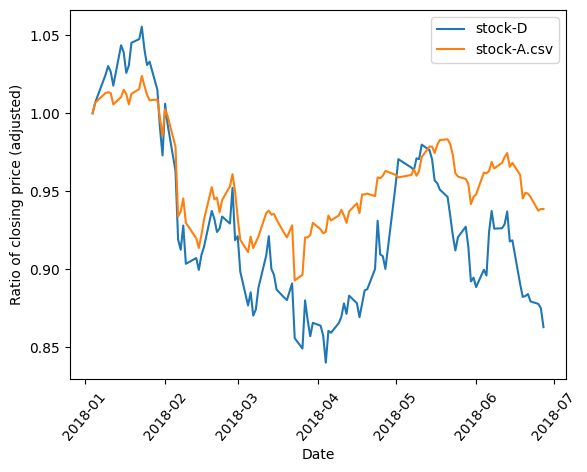

In [11]:
#Cell_10.
plt.plot(merged_date, merged_mufj/merged_mufj[0], label='stock-D')
plt.plot(merged_date, merged_com/merged_com[0], label=com_label)
plt.xlabel('Date')
plt.ylabel('Ratio of closing price (adjusted)')
plt.xticks(rotation=50)
plt.legend()
plt.show()

相関係数最大(負の相関であることを期待)の企業との散布図とチャート重ね合わせ

In [12]:
#Cell_11.
com=pd.read_csv(csv_list[i_min],skiprows=0,header=0,delimiter=',',encoding="utf-8")
com['日付']=pd.to_datetime(com['日付'])
merged=pd.merge(df_a, com, on='日付', how='inner')
merged_date=merged['日付']
merged_date=pd.to_datetime(merged_date) #str型からdatetime型に型変換
merged_mufj=merged['終値調整値_x']
merged_com=merged['終値調整値_y']
print(csv_list[i_min]+':', r_list[i_min])

stock-B.csv: -0.07079812367922954


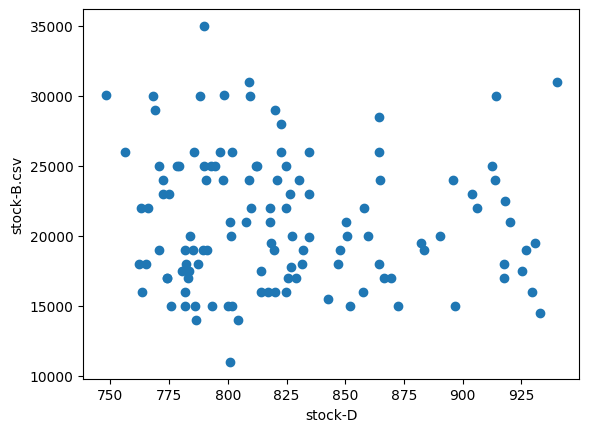

In [13]:
#Cell_12.
plt.scatter(merged_mufj, merged_com)
plt.xlabel('stock-D')
com_label=re.sub(r'_2018[.]csv$', r'', csv_list[i_min])
plt.ylabel(com_label)
plt.show()

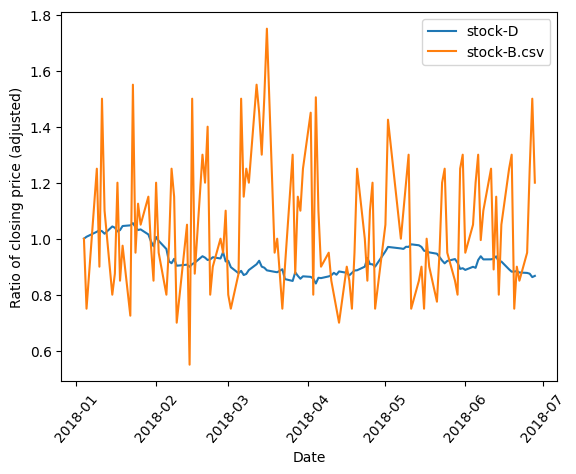

In [14]:
#Cell_13.
plt.plot(merged_date, merged_mufj/merged_mufj[0], label='stock-D')
plt.plot(merged_date, merged_com/merged_com[0], label=com_label)
plt.xlabel('Date')
plt.ylabel('Ratio of closing price (adjusted)')
plt.xticks(rotation=50)
plt.legend()
plt.show()

相関係数ゼロ付近の企業との散布図とチャート重ね合わせ

In [15]:
#Cell_14.
com=pd.read_csv(csv_list[i_zero],skiprows=0,header=0,delimiter=',',encoding="utf-8")
com['日付']=pd.to_datetime(com['日付'])
merged=pd.merge(df_a, com, on='日付', how='inner')
merged_date=merged['日付']
merged_date=pd.to_datetime(merged_date) #str型からdatetime型に型変換
merged_mufj=merged['終値調整値_x']
merged_com=merged['終値調整値_y']
print(csv_list[i_zero]+':', r_list[i_zero])

stock-B.csv: -0.07079812367922954


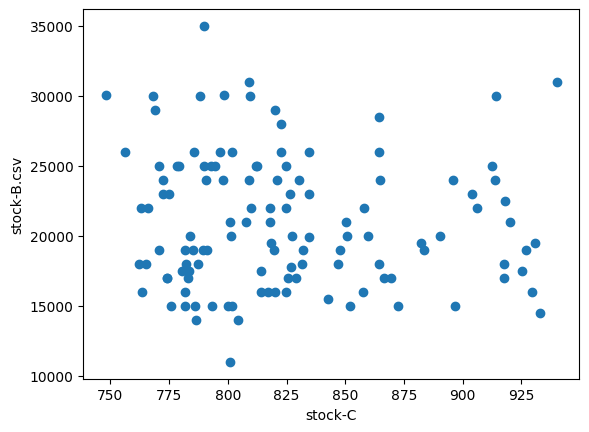

In [16]:
#Cell_15.
plt.scatter(merged_mufj, merged_com)
plt.xlabel('stock-C')
com_label=re.sub(r'_2018[.]csv$', r'', csv_list[i_zero])
plt.ylabel(com_label)
plt.show()

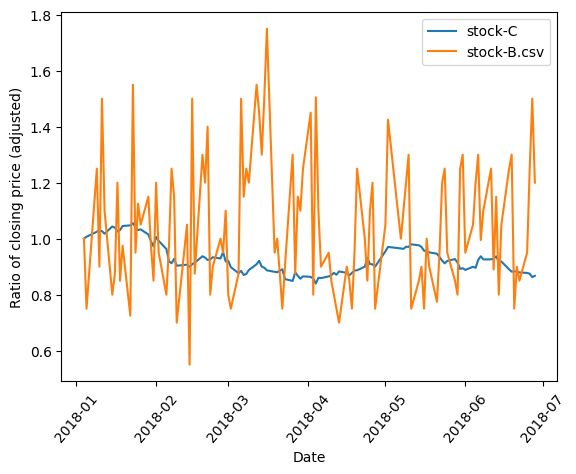

In [17]:
#Cell_16.
plt.plot(merged_date, merged_mufj/merged_mufj[0], label='stock-C')
plt.plot(merged_date, merged_com/merged_com[0], label=com_label)
plt.xlabel('Date')
plt.ylabel('Ratio of closing price (adjusted)')
plt.xticks(rotation=50)
plt.legend()
plt.show()